# Assignment (Milestone 1)

In this assignment, we want to read in the `retail-churn.csv` dataset and run some EDA on the data. Generally speaking, when we run EDA on a dataset, we don't have a particular goal in mind. Instead we want to get a "gut-feel" for what the data looks like. The goal of the assignment is to show your ability to examine a dataset with increasing depth as you go.

In [2]:
import pandas as pd
import numpy as np

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("data/retail-churn.csv", sep = ",", skiprows = 1, names = col_names)
churn.head()

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


Here are some examples of questions we can be asking:

1. What are the columns, their types and their distribution (when it makes sense)? <span style="color:red" float:right>[1 point]</span>

In [64]:
#Question 1

print(churn.columns)
print(churn.dtypes)
churn.describe()

Index(['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp',
       'item_id', 'quantity', 'dollar'],
      dtype='object')
user_id               int64
gender               object
address              object
store_id              int64
trans_id              int64
timestamp    datetime64[ns]
item_id               int64
quantity              int64
dollar              float64
dtype: object


,user_id,store_id,trans_id,item_id,quantity,dollar
count,2.522040e+05,252204.000000,2.522040e+05,2.522040e+05,252204.000000,252204.000000
mean,1.395660e+06,126101.500000,1.229771e+06,4.467833e+12,1.385692,130.911389
std,6.094769e+05,72805.167983,2.350992e+05,1.679512e+12,3.705732,388.142169
min,1.113000e+03,0.000000,8.177470e+05,2.000882e+07,1.000000,1.000000
25%,9.937150e+05,63050.750000,1.025926e+06,4.710000e+12,1.000000,42.000000
50%,1.586046e+06,126101.500000,1.233476e+06,4.710000e+12,1.000000,76.000000
75%,1.862232e+06,189152.250000,1.433222e+06,4.710000e+12,1.000000,132.000000
max,2.179605e+06,252203.000000,1.635482e+06,9.790000e+12,1200.000000,70589.000000


2. Do the columns have the right types for the analysis? If not, convert them to the right type. <span style="color:red" float:right>[1 point]</span>

It appears that "user_id","store_id","trans_id" and "quantity" all have the correct datatype of int64. Address also appears correct with "object". 
Gender could be correct if they are not expecting a binary output, I have decided not to mess with that one.
So the types that have to change are dollar from int64 to float64, and the item id from a float64 to an int64
Additonally we change the timestamp from type object to type datetime64[ns]

In [65]:
# Question 2

# conversion of data types 
churn["dollar"] = churn["dollar"].astype(float)
churn["item_id"] =churn["item_id"].astype(int)
churn['timestamp']= pd.to_datetime(churn['timestamp'])
print(churn.dtypes)
churn.head()

user_id               int64
gender               object
address              object
store_id              int64
trans_id              int64
timestamp    datetime64[ns]
item_id               int64
quantity              int64
dollar              float64
dtype: object


,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,2000-11-01,4710000000000,1,37.0
1,101981,F,E,2861,818464,2000-11-01,4710000000000,1,17.0
2,101981,F,E,2862,818465,2000-11-01,4710000000000,1,23.0
3,101981,F,E,2863,818466,2000-11-01,4710000000000,1,41.0
4,101981,F,E,2864,818467,2000-11-01,4710000000000,8,288.0


3. Do any columns appear to have unique rows? How do we show that? <span style="color:red" float:right>[1 point]</span>

In [66]:
#Question 3

for i in churn.columns: #loops through columns
    print("Column",i, "is unique = ", len(churn[i].unique()) == len(churn[i].tolist())) #checks it column i is unique

Column user_id is unique =  False
Column gender is unique =  False
Column address is unique =  False
Column store_id is unique =  True
Column trans_id is unique =  True
Column timestamp is unique =  False
Column item_id is unique =  False
Column quantity is unique =  False
Column dollar is unique =  False


4. What are some "obvious" questions we can ask about the data? We can ask many questions here, but we limit it to two:
   - Is quantity or volume ever negative and why? <span style="color:red" float:right>[1 point]</span>
   - What is the date range covered by the data? <span style="color:red" float:right>[1 point]</span>  
     HINT: You will need to convert `timestamp` into an a `datetime` column. You can use `pd.to_datetime` for that. We leave it to you to learn more about working with `datetime` colums.

In [67]:
# Question 4 part 1 "Is quantity or volume ever negative and why? "

# quantity or volume negitive, quantity is never negaitve because physically you cannot have a negitive quantity.
print("Is quantity or volume ever negative:",churn.quantity.lt(0).any())
print("This is because Quantity is a scalar real quantity and thus cannot be reprenseted by a negitive number")

Is quantity or volume ever negative: False
This is because Quantity is a scalar real quantity and thus cannot be reprenseted by a negitive number


In [68]:
# Question 4 part 2 "What is the date range covered by the data?"
import datetime 
# "timestamp" is alread converted to datetime 
print("Start:",min(churn["timestamp"]) )
print("Stop:",max(churn["timestamp"]) )
print("Change:",max(churn["timestamp"]) - min(churn["timestamp"]))


Start: 2000-11-01 00:00:00
Stop: 2001-02-28 00:00:00
Change: 119 days 00:00:00


5. What are some "not-so-obvious" questions we can ask about this data? What are some important summary statistics and visualizations we should look at to answer them? Note that having domain knowledge can make this easier, so here's a list of questions and your task is to pick at least two questions and answer them using statistical summaries or visualizations:
   - How many transactions on average do users have in a given week? <span style="color:red" float:right>[2 point]</span>
   - Are there items that are more commonly sold in bulk (quantity greater than 1)? <span style="color:red" float:right>[2 point]</span>
   - How do quantity and volume tend to change over the course of the day (hour by hour)? <span style="color:red" float:right>[2 point]</span>
Note that the above questions are intetionally phrased to sound non-technical. It is up to you to "translate" them into something that can be answered by a query on the data or a visualization.

In [69]:
# Question 5. part 1 "How many transactions on average do users have in a given week?" 
from datetime import timedelta

# Initializations 
weeklys =[]
init_date = churn["timestamp"][0]
transactions = 0


for i in churn["timestamp"]: #loops through transactions 
    if(i - init_date) < timedelta(days = 7): # bins into weeks 
        transactions += 1
        current_date = i
    else:
        weeklys.append(transactions) # adds to weeklys when it reaches a week diffrence
        init_date = i
        transactions = 0
print( "Average Weekly transactions is:", sum(weeklys)/len(weeklys)) 

Average Weekly transactions is: 14665.411764705883


Text(0.5, 1.0, 'Bar Graph of Average Quantity in Transactions per day')

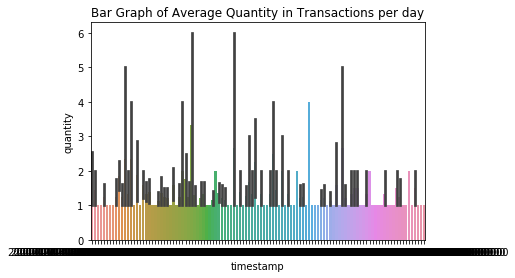

In [70]:
# Question 5. part 3 "How do quantity and volume tend to change over the course of the day "

#change in quantity 
import seaborn as sns
sample = churn.sample(500)
sns.barplot(x = sample["timestamp"], y = sample["quantity"]).set_title("Bar Graph of Average Quantity in Transactions per day")

The Above Plot shows that the Average Quantity per day is about 1 (Slope of colored portion is about 0 at about y = 1) whilst there is some outliers which is represented by the maxes shown by the black portion of the graph. Each bar is an individual day. We can also realize that this is a sample and since the Day to Day isnt necessarily correlated that individual spikes are insignifagant to the overall average. If we use these values the average per day is no longer viable thus we can consider them outliers.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of Transactions per Day')

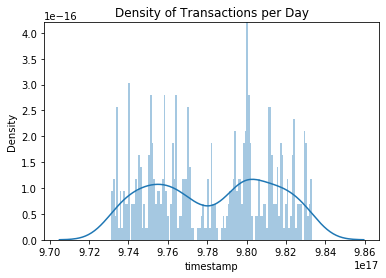

In [71]:
#change in volume
sns.distplot(sample["timestamp"],bins = 119).set_title("Density of Transactions per Day")

All timestamps have the same hourly input so it is not possible to distribute hourly. Daily is a possibility. The above Graph shows the distributin of Transactions per day. The fit line represents a contiounious funciton that could model our data. When looking at this data we must realize that the function is only viable within the timespan of the data 
    - Start: 2000-11-01 00:00:00
    - Stop: 2001-02-28 00:00:00
    - Change: 119 days 00:00:00

6. Do the results mesh with what we expected? Note that to answer this we need to have some domain knowledge, so you can ignore this for the assignment. <span style="color:red" float:right>[0 point]</span>

7. What are additional features we could extract from the data? This is especially relevant if the data contains a timestamp column or raw text column (such as a full address for example). <span style="color:red" float:right>[1 point]</span>

    -Total Revinue
    -Peak sales days
    -number of types of products
    -best selling of products
    -which products are most often purchased on what day 
    -the price at which a particular item sells most often at
    -types of gender

8. Do I see any relationships between the features in the data? You will need to back this up with some statistical summaries or visualizations like what we covered in the lab. <span style="color:red" float:right>[2 point]</span>

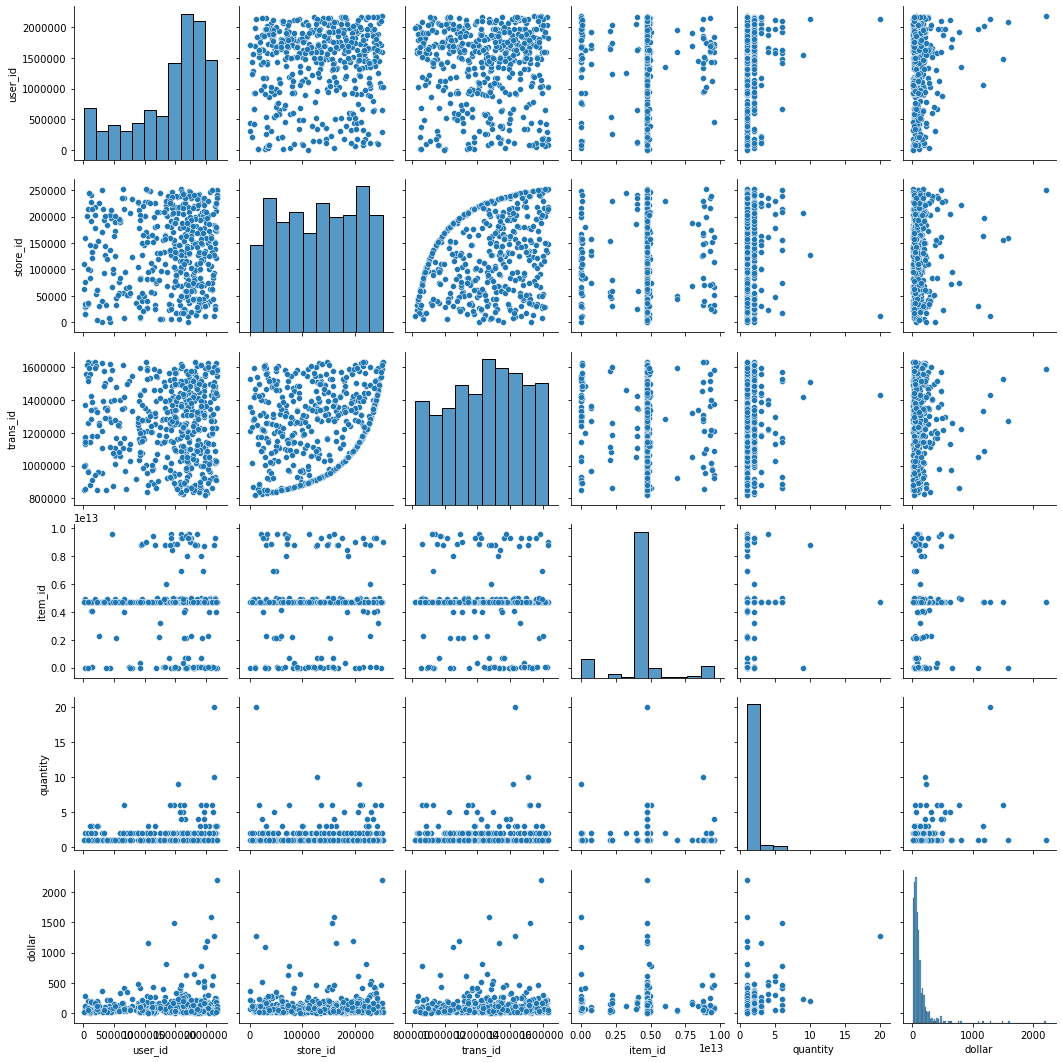

In [72]:
# Question 8 graphing
sns.pairplot(churn.sample(500))

    - we can see from [1,4]  [2,4] and [3,4] that there are three highly common item ids that sell the most 
    - we can see from [2,3] that there is a hyperbolic trend barrier for trans_id versus store_id 
    - we can see from [1,6]  [2,6] and [3,6] that the three types of IDs are independent of dollar amount 
    - we can see from [4,6] that the highest dollar amounts also come from the highest selling product IDs 
    - we can see from [1,2] amd [1,3] that high user_ids are more common 
    - we can see from [4,5] that the most common selling item also sells in the highest quantity 

Run EDA on the data and answer the above questions and any additional questions that may cross your mind along the way. As you can imagine, there isn't a single way to proceed, and the answer doesn't always have to be exact. It is up to you to decide how you want to convey the results, but assume that your audience is non-technical and not familiar with some of the terminology we learned in the lecture.

There are also third-party libraries we can used to run EDA. One example is the `pandas-profiling` library which provides us with a full report. You do not need to use it in this assignment, but we recommend that you install it and take a look on your own time.

# End of assignment